In [2]:

import CarbonaraDataTools as cdt
from tqdm import tqdm
import os
import shutil
import subprocess
import numpy as np
import matplotlib.pyplot as plt



In [12]:
!pwd

/Users/josh/Documents/PhD/DevDungeon/carbonara


In [13]:
'build/bin/generate_structure'

'build/bin/generate_structure'

In [14]:
# smcl_fp = 'newFitData/single_fitting/smarcal_af/fingerPrint1.dat'
# af_coords = 'newFitData/single_fitting/smarcal_af/coordinates1.dat'

# def generate_random_structures(coords_file, fingerprint_file):

#     '''Generate random structures changing one linker section at a time

#     Parameters
#     coords_file:       /path/ to CA coordinates.dat file
#     fingerprint_file:  /path/ to fingerprint.dat file

#     Return
#     Generated structures are written to ~/rand_structures/.. section_*LINKERINDEX*.dat as xyz
#     Linker Indices
#     '''
# secondarystruct = cdt.get_secondary(smcl_fp)

# linker_indices_sep = [cdt.find_linker_indices( cdt.section_finder(i)) for i in secondarystruct]

# linker_indices =[]


# currMax=0
# for i in range(0,len(linker_indices_sep)):
#     for j in range(0,len(list(linker_indices_sep[i]))):
#         linker_indices.append(list(linker_indices_sep[i])[j]+currMax)
#     currMax = currMax +list(linker_indices_sep[i])[-1]+1

# #print(linker_indices)
# linker_indices =np.asarray(linker_indices)
# current = os.getcwd()
# random = 'rand_structures'
# random_working = os.path.join(current, random)

# # if os.path.exists(random_working) and os.path.isdir(random_working):
# #     shutil.rmtree(random_working)

# os.mkdir(random_working)


# linker_indices = linker_indices[8:9] 


# # try:

# # except OSError as error:
# #     print(str(error)[11:])

# print('Beginning random structures generation \n')

# rand_file_dict = {}
# for l in tqdm(linker_indices):

#     outputname = random_working+'/section_'+str(l)

# #         !./generate_structure {fingerprint_file} {coords_file} {outputname} {l}
#     result = subprocess.run(['./build/bin/generate_structure', smcl_fp, af_coords, outputname, str(l)], capture_output=True, text=True)



# print('')
# print('Finished generating random structures')

    # return linker_indices

Beginning random structures generation 



  0%|          | 0/1 [00:00<?, ?it/s]


KeyboardInterrupt: 

In [131]:
smcl_fp = 'newFitData/single_fitting/smarcal_af/fingerPrint1.dat'
af_coords = 'newFitData/single_fitting/smarcal_af/coordinates1.dat'
secondarystruct = cdt.get_secondary(smcl_fp)
coords = cdt.read_coords(af_coords)

In [134]:


def visualise_varying_sections(coords, secondary_structure, varying_linker):

    x_lst, y_lst, z_lst, color_lst =  cdt.smooth_me_varying(coords, secondary_structure, varying_linker, oversample=5)
    structure_fig = cdt.line_plotly(x_lst, y_lst, z_lst, color_lst, outline=True)
    structure_fig.update_layout(height=600)
    structure_fig.show()

linker_indices = [17]
visualise_varying_sections(coords, secondarystruct[0], linker_indices)


In [186]:
rand_c = 'rand_structures/section_17_20.dat'

coords_gen = cdt.read_coords(rand_c)

visualise_varying_sections(coords_gen, secondarystruct[0], linker_indices)


In [153]:
import wiggle.writhe as wr
from wiggle.writhe_evo import writhe_heatmap_plotly

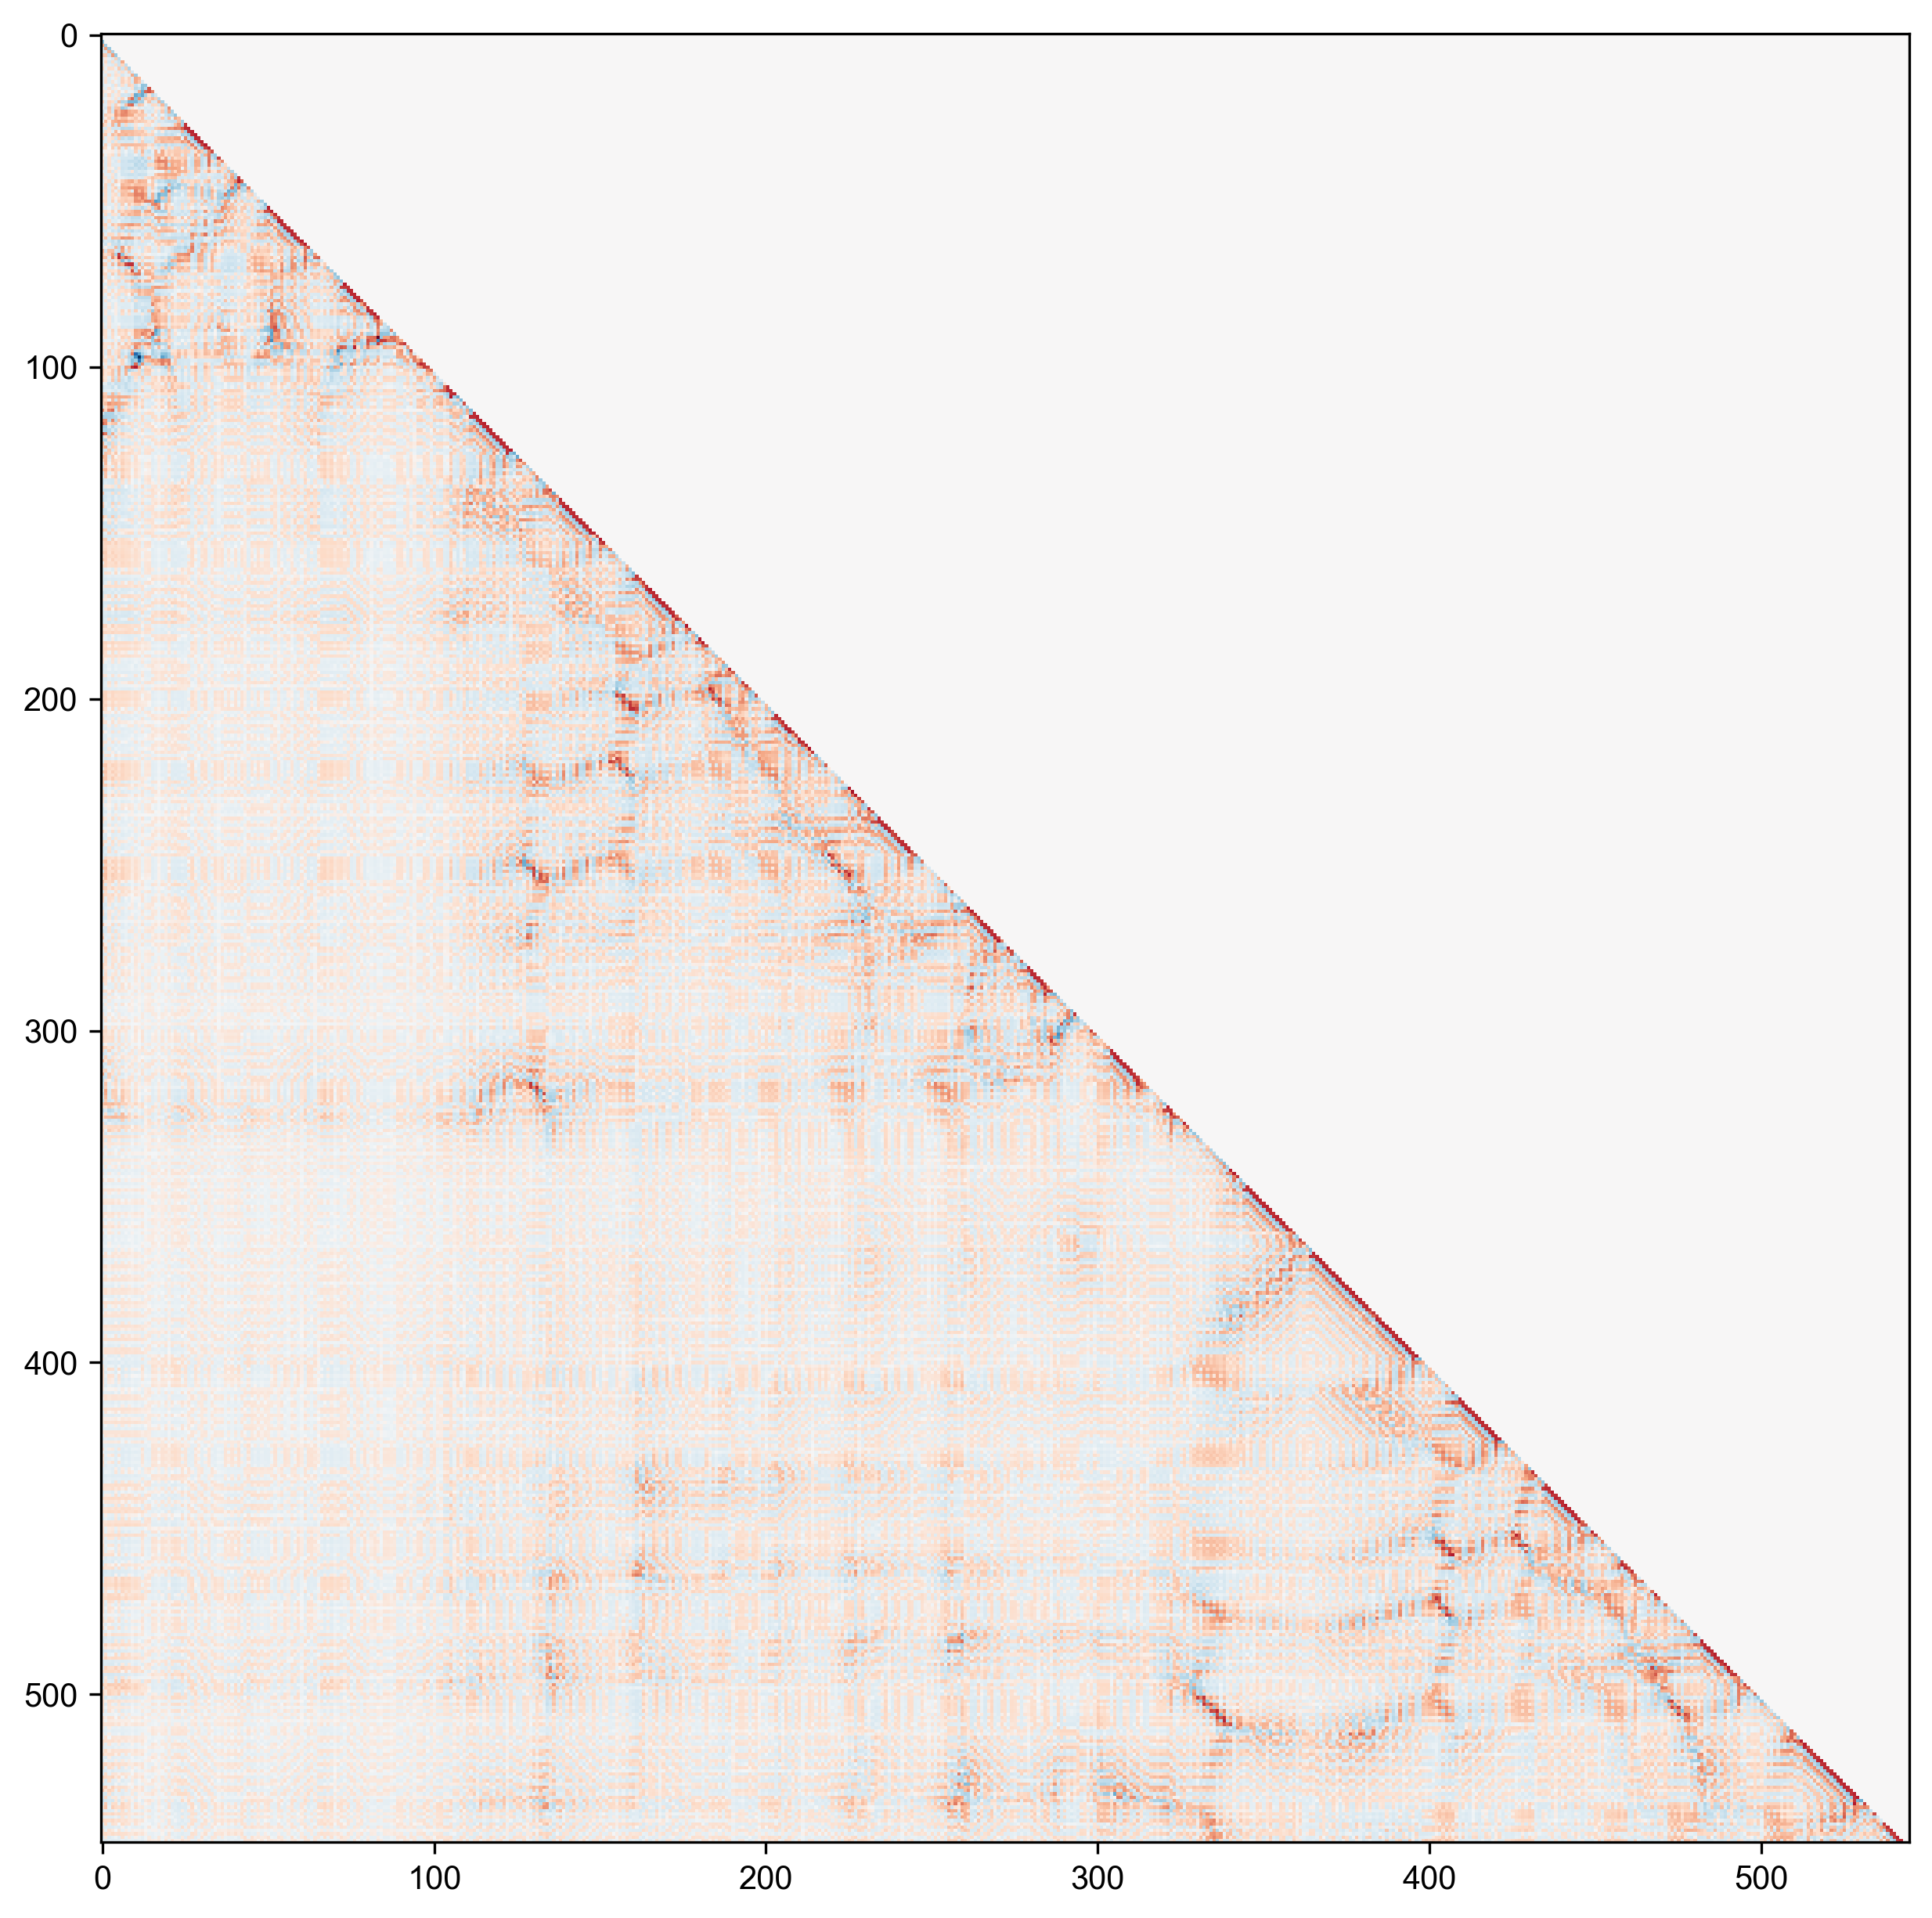

In [170]:
from matplotlib.colors import TwoSlopeNorm
sigma = wr.find_Sigma_array(coords_gen)

s_3 = np.abs(sigma)**(1/3)
s = s_3 * np.sign(sigma)

norm = TwoSlopeNorm(vmin=np.min(s), vcenter=0, vmax=np.max(s))

plt.figure(figsize=(10,10), dpi=300)
plt.imshow(s, cmap='RdBu_r', norm=norm)

In [185]:
np.max(wr.find_Sigma_array(coords_gen))

0.8222896354612511

In [173]:
np.max(wr.find_Sigma_array(coords))

0.10489306315211759

In [ ]:
# 1, 5, 10, 11, 15

In [7]:
# rand_c = 'rand_structures/section_17_5.dat'

# coords_gen = cdt.read_coords(rand_c)

# visualise_varying_sections(coords_gen, secondarystruct[0], linker_indices)

In [6]:
# rand_c = 'rand_structures/section_17_7.dat'

# coords_gen = cdt.read_coords(rand_c)

# visualise_varying_sections(coords_gen, secondarystruct[0], linker_indices)

In [5]:
# rand_c = 'rand_structures/section_17_9.dat'

# coords_gen = cdt.read_coords(rand_c)

# visualise_varying_sections(coords_gen, secondarystruct[0], linker_indices)

In [205]:
from wiggle.CA_2_AA import CA2AA_secondary
from wiggle.CarbonaraDataTools import Carbonara_2_PDB

sec_lst = list(secondarystruct[0])
# struct_lst = ['rand_structures/section_17_1.dat', 'rand_structures/section_17_5.dat', 'rand_structures/section_17_10.dat', 'rand_structures/section_17_11.dat', 'rand_structures/section_17_15.dat']
struct_lst = ['rand_structures/mol1_sub_0_end_xyz.dat']
for s in struct_lst:

    ca_output = s.split('.')[0] + '_CA.pdb'
    Carbonara_2_PDB(s, smcl_fp, ca_output)

    aa_output = s.split('.')[0] + '_AA.pdb'
    CA2AA_secondary(ca_output, aa_output, sec_lst)

FileNotFoundError: rand_structures/end_xyz.pdb not found.

In [188]:
# make hydration into a pdb 
import biobox as bb
import pandas as pd

def hydration_2_PDB(hydra_file, output_file):

    '''
    Writes alpha carbon PDBs from Carbonara output

    Input
        coords_file      : coordinates of the carbon alpha chain
        fingerprint_file : Carbonara specific format containing secondary structure and sequence
        output_file      : define name of write output
    '''

    # read in coordinates and fingerprint
    coords = cdt.extract_coords(hydra_file)
    size = coords.shape[0]
    seq = ['HOH']*size

    # create dataframe for biobox molecule type
    df = pd.DataFrame({'atom':['HETATM']*size, 'index':np.arange(size), 'name':['O']*size,
                       'resname':seq, 'chain':['A']*size, 'resid':np.arange(size),
                       'occupancy':[1]*size, 'beta':[50]*size, 'atomtype':['O']*size,
                       'radius':[1.7]*size, 'charge':[0]*size})

    # take full advantage of Matteo's lovely biobox library - manually 'create' a molecule
    molecule = bb.Molecule()
    molecule.data = df
    molecule.coordinates = np.expand_dims(coords, axis=0)

    # write out!
    molecule.write_pdb(output_file)

In [206]:
hydration_2_PDB('rand_structures/structure_bestfit_hydration_shell.dat', 'rand_structures/structure_bestfit_hydration_shell.pdb')

In [197]:
hydration_2_PDB('rand_structures/best_change_hydration_shell.dat', 'rand_structures/best_change_hydration_shell.pdb')

In [17]:
def get_carb_saxs(saxs_file):
    arr = np.genfromtxt(saxs_file, skip_footer=1)

    q = arr[:,0]

    I_exp = arr[:,3]
    I_mod = arr[:,2]

    return q, I_exp, I_mod

q_og, I_exp_og, I_mod_og = get_carb_saxs('rand_structures/OG')
plt.scatter(q_og, I_exp_og, label='I_exp')
plt.plot(q_og, I_mod_og, label='I_mod')

FileNotFoundError: rand_structures/OG_step_0_scatter.dat not found.

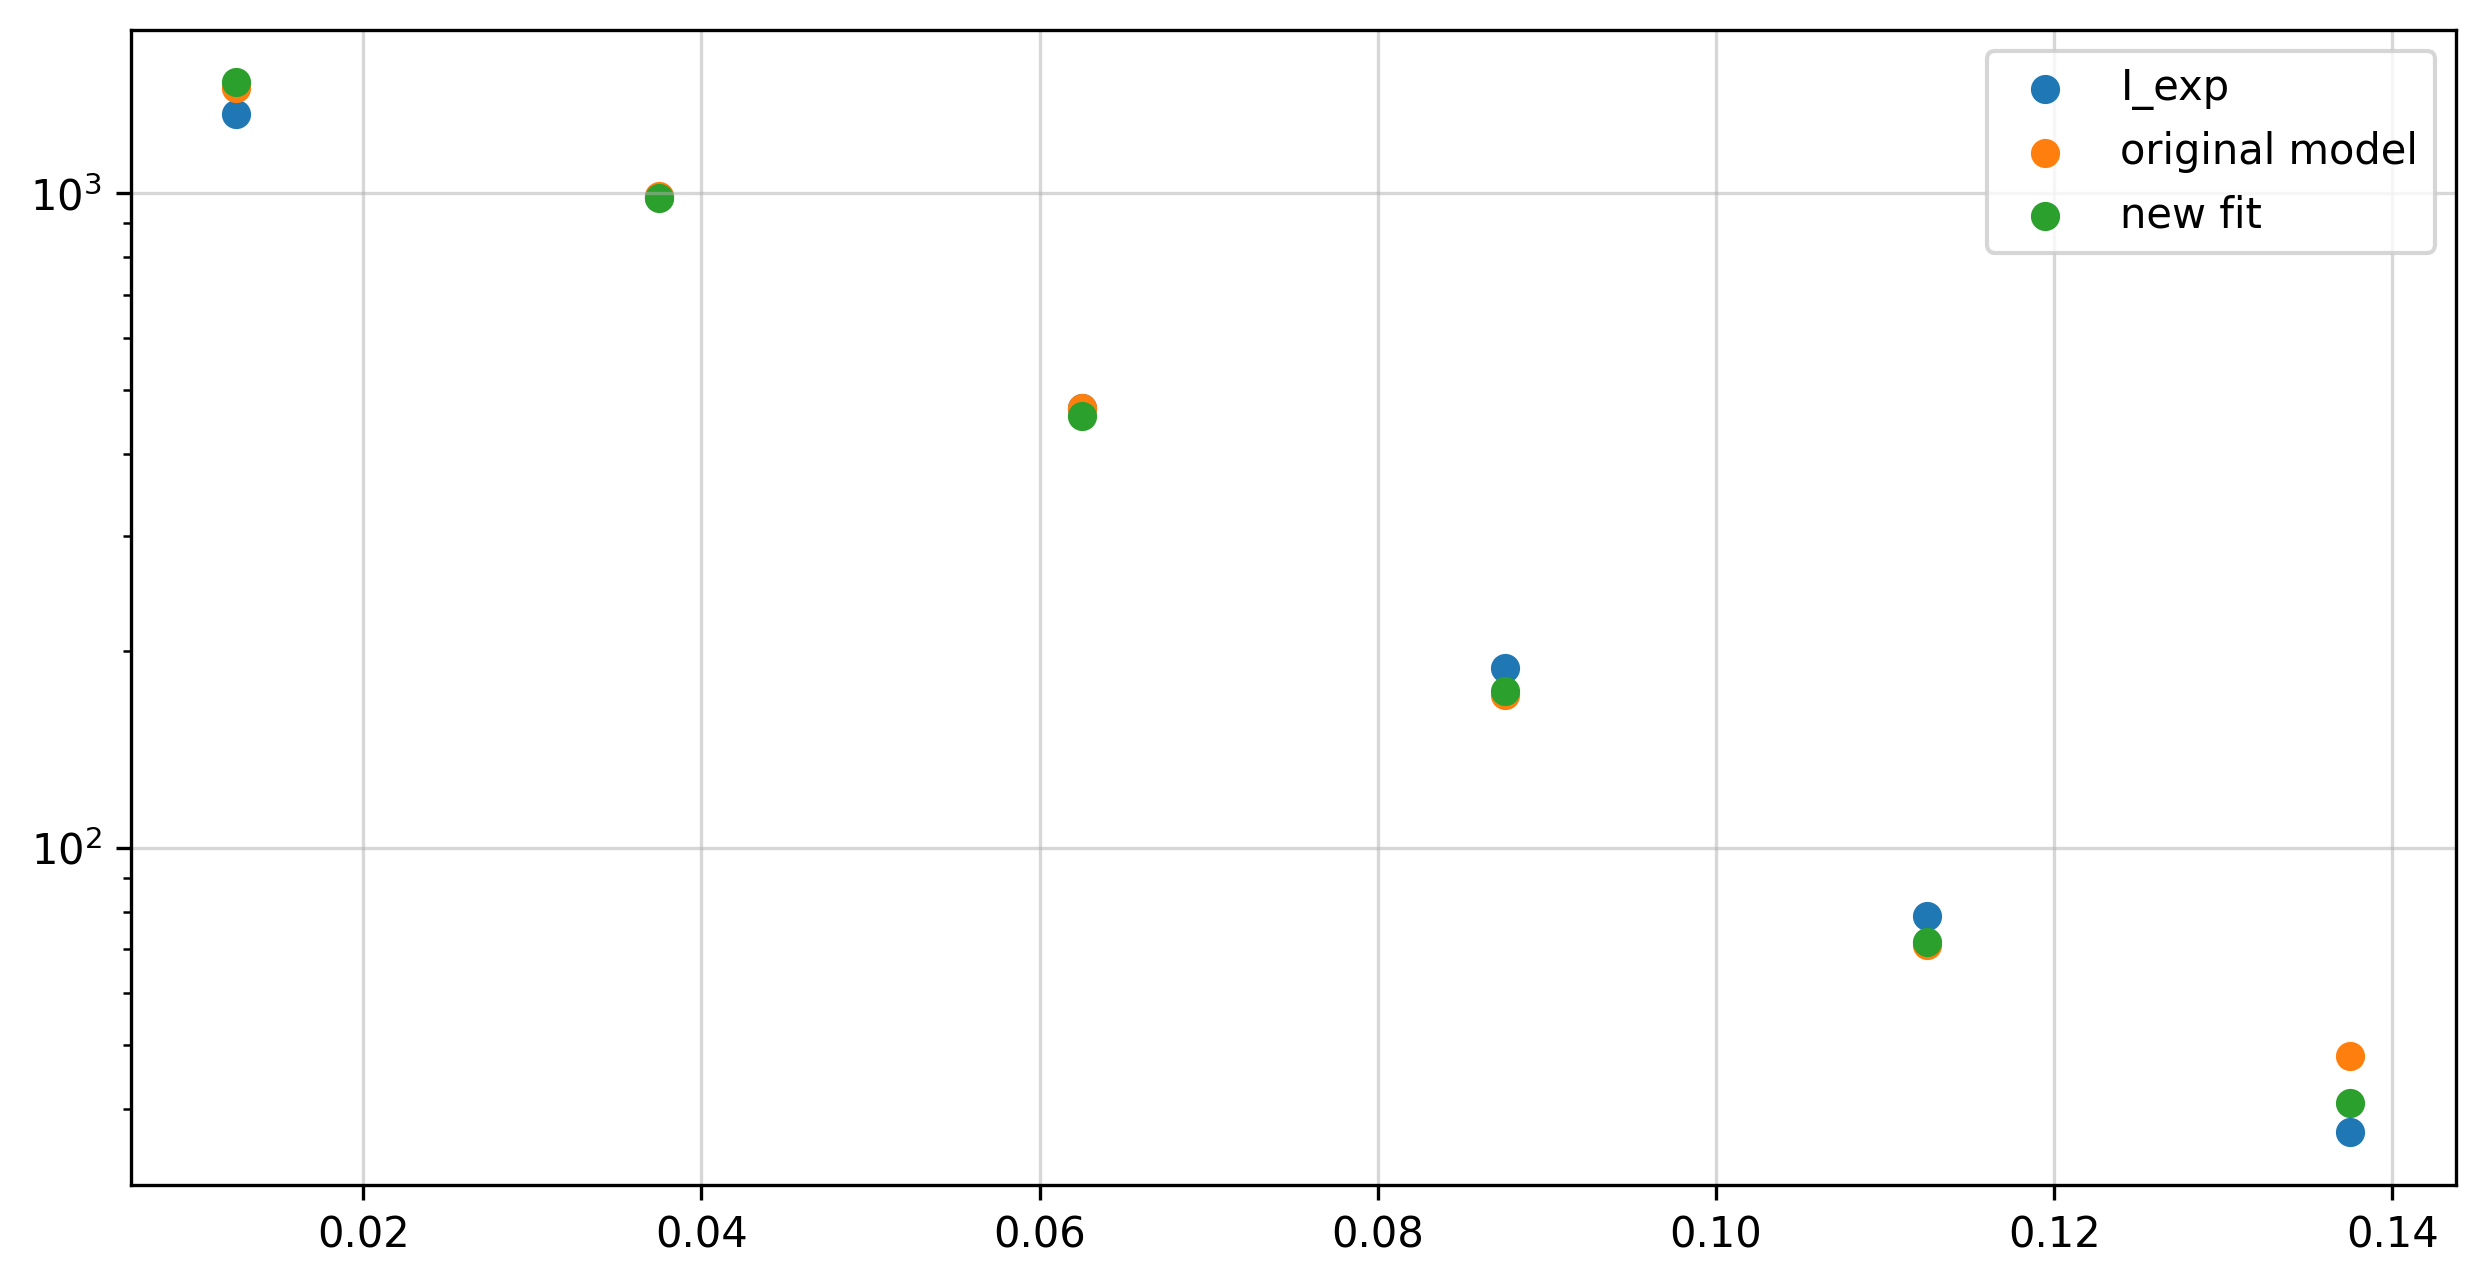

In [206]:
q, I_exp, I_mod = get_carb_saxs('rand_structures/best_change_scatter.dat')    

plt.figure(figsize=(10,5), dpi=300)
plt.scatter(q, np.exp(I_exp), label='I_exp')

plt.scatter(q_og, np.exp(I_mod_og), label='original model')

plt.scatter(q, np.exp(I_mod), label='new fit')

plt.grid(alpha=0.5)
plt.legend()
plt.yscale('log')

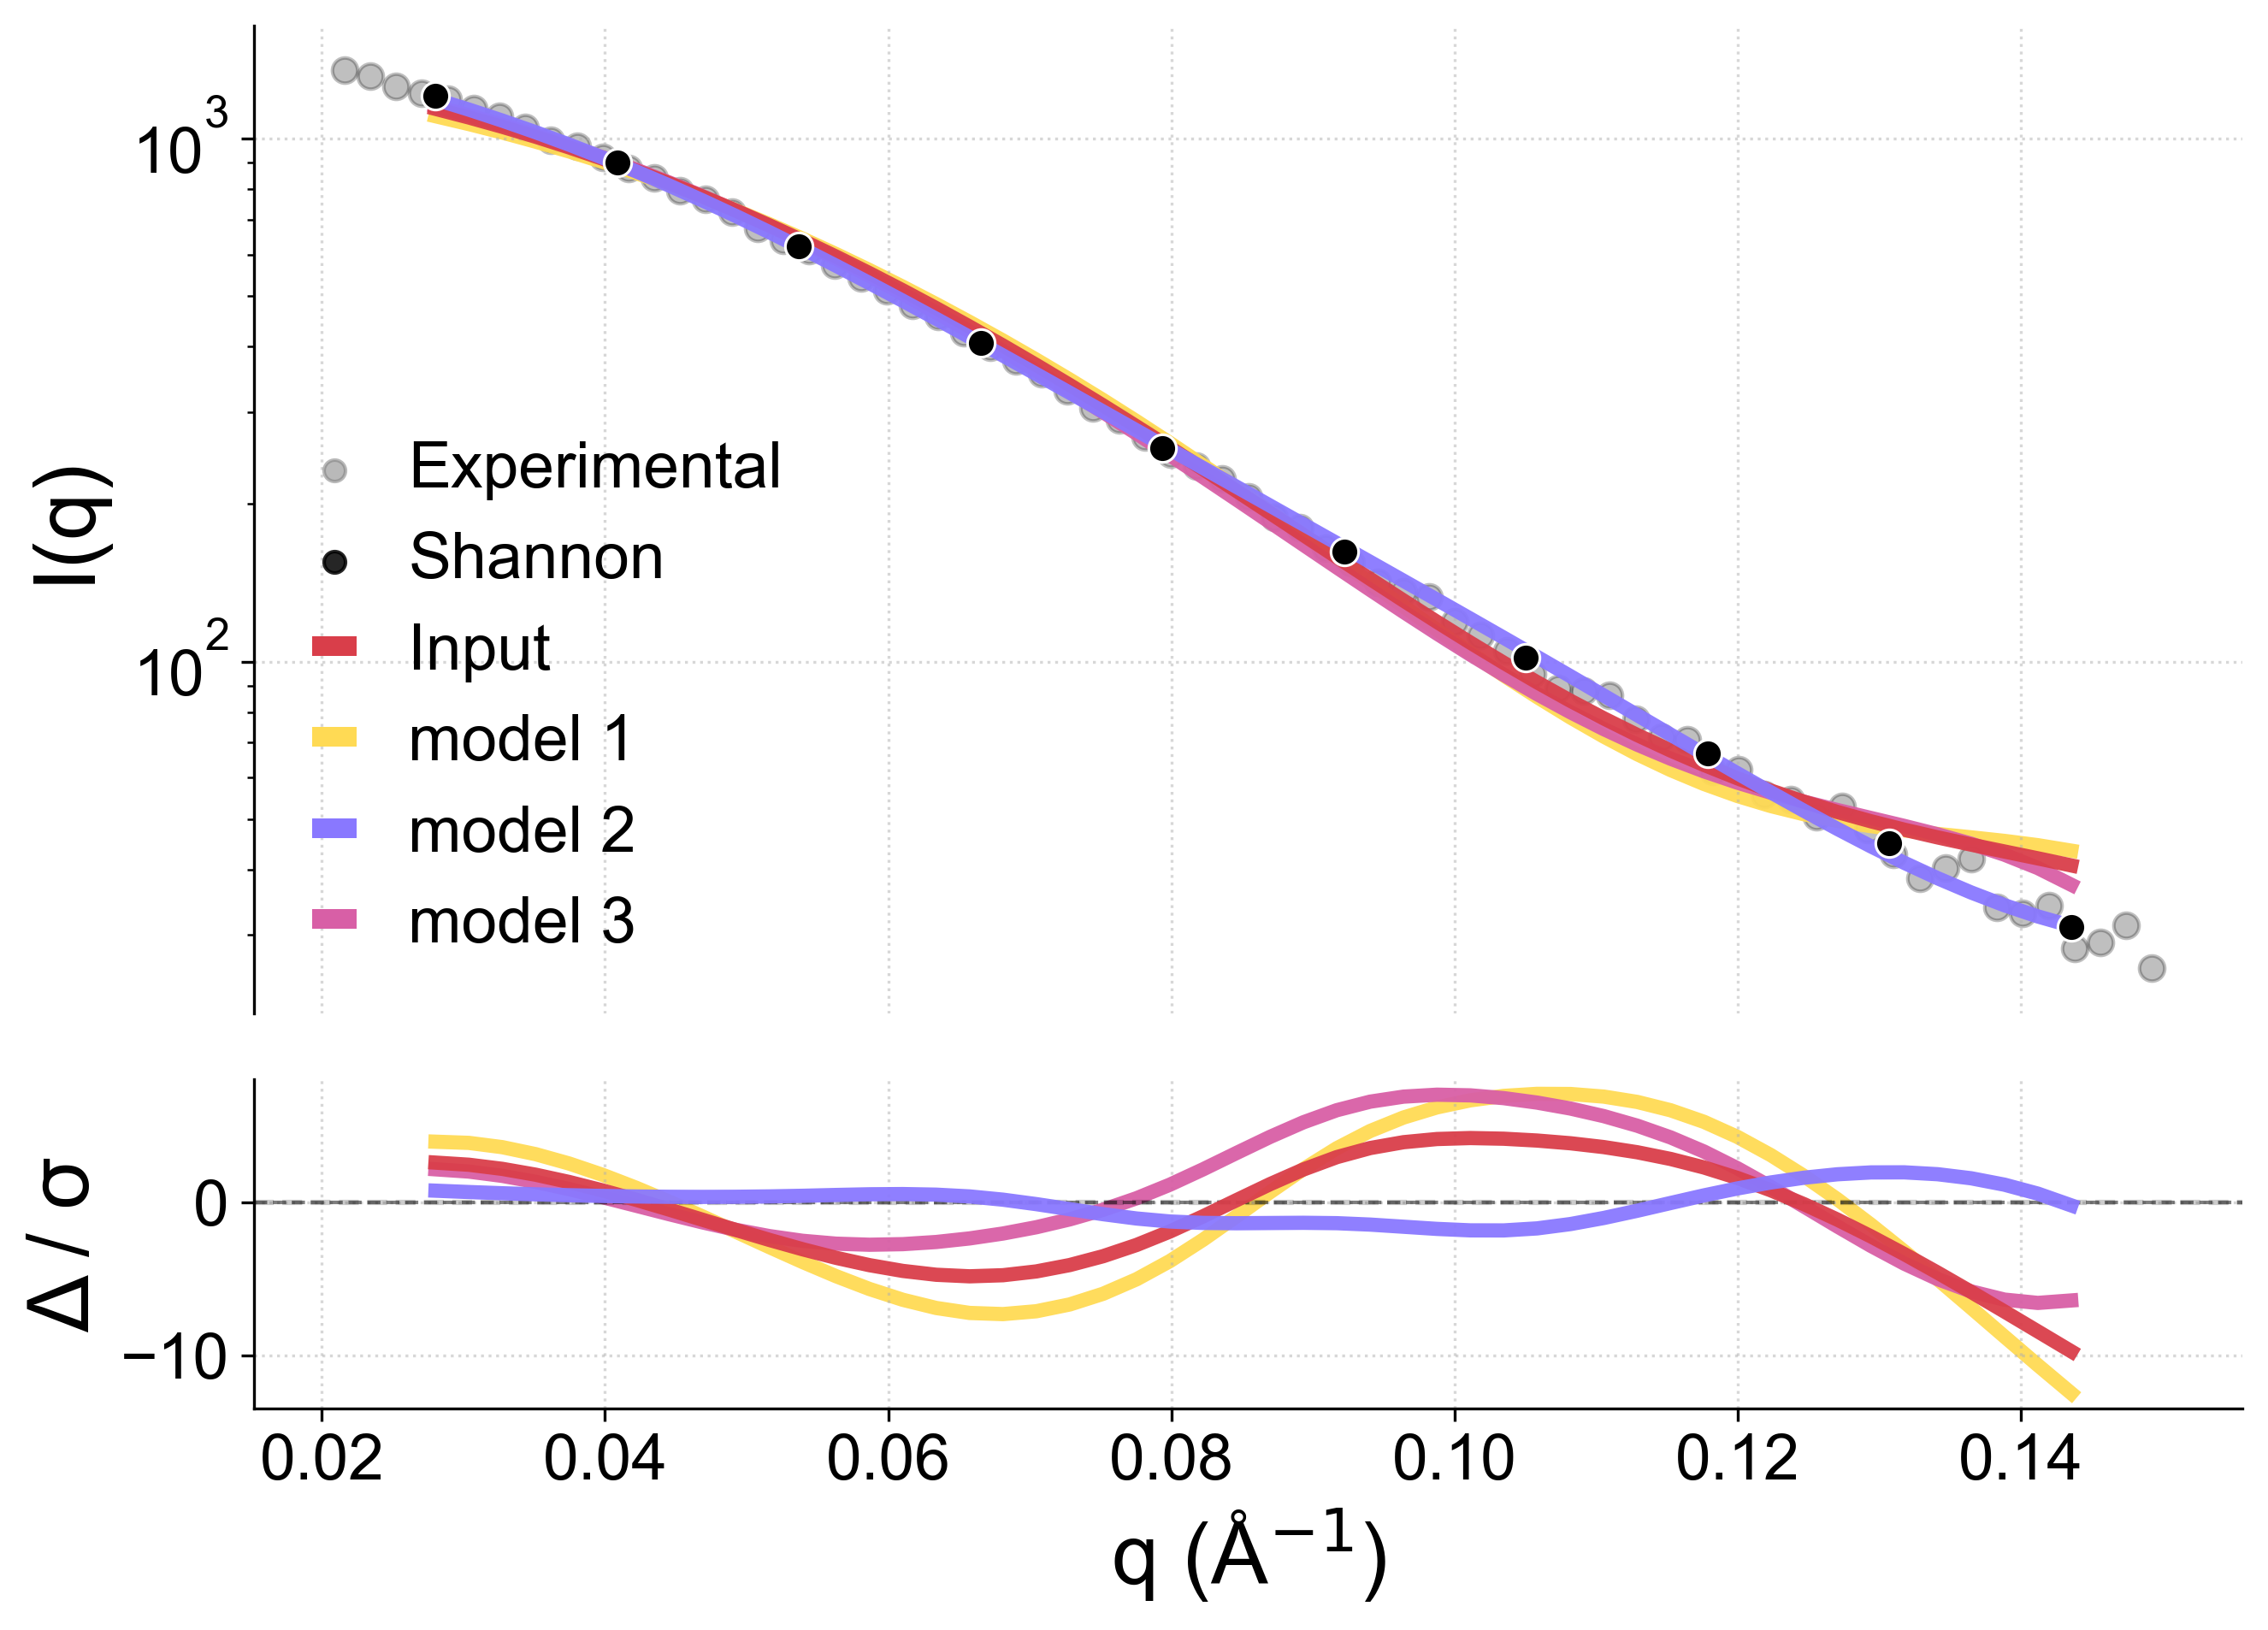

In [120]:


# cameron_plotting(q_exp, np.exp(I_exp), mod_dict, maxq=0.22, ylims=None, savename='rand_structures/Carbonara_fitting.svg')

from matplotlib.ticker import AutoMinorLocator
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['svg.fonttype'] = 'none'

from scipy.interpolate import UnivariateSpline
from matplotlib.patches import Patch
from matplotlib.lines import Line2D


import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


import matplotlib.cm as cm
import matplotlib.colors as mcolors


plt.rcParams.update({'font.family': 'Arial'})

COLORS = {
    'red': '#b2182b',
    'blue': '#2166ac',
    'exp': 'black',
    'errorbar': 'lightgrey'
}
MODEL_COLORS = [COLORS['red'], COLORS['blue'], 'orange', 'green', 'purple', 'cyan', 'magenta']
FONTSIZE = {
    'xlabel': 24,
    'ylabel': 24,
    'title': 16,
    'legend': 18,
    'tick': 18
}

def preprocess_data(q, I, minq, maxq):
    cond = (q >= minq) & (q <= maxq) & (I > 0)
    return q[cond], I[cond]


def calculate_model_data(q_shannon, I_shannon, mod_dict):
    
    model_data = []
    for name, (q_mod, I_mod) in mod_dict.items():
        f = UnivariateSpline(q_mod, I_mod, s=0)
        I_mod_interp = f(q_shannon)
        scale_factor = np.sum(np.log(I_shannon) * np.log(I_mod_interp)) / np.sum(np.log(I_mod_interp) ** 2)
        I_mod_scaled = I_mod_interp * scale_factor

        

        logged_residual = np.log(I_shannon) - np.log(I_mod_scaled)

        q_new = np.linspace(min(q_shannon), max(q_shannon))
        I_mod_scaled_int = scale_factor * f(q_new)

        model_data.append({
            'name': name,
            'int_q': q_new,
            'I_mod_scaled': I_mod_scaled_int,
            'logged_residual': logged_residual,
        })

    return model_data

def setup_plot():
    plt.rcParams.update({'font.family': 'Arial'})
    fig = plt.figure(figsize=(10, 7), dpi=300)
    gs = fig.add_gridspec(2, 1, height_ratios=[3, 1], hspace=0.1)
    ax0 = fig.add_subplot(gs[0])
    ax1 = fig.add_subplot(gs[1], sharex=ax0)
    return fig, ax0, ax1

def plot_experimental_data(ax, q, I):
    ax.scatter(q, I, label='Experimental',
                color=COLORS['exp'], alpha=0.25, zorder=0, s=50)

# def plot_model_data(ax0, ax1, q, model_data):
#     for i, data in enumerate(model_data):
#         color = MODEL_COLORS[i % len(MODEL_COLORS)]
#         ax0.plot(data['int_q'], data['I_mod_scaled'], color=color, label=f"{data['name']}", zorder=2, alpha=0.8, linewidth=2)
#         # ax1.scatter(q, data['delta_residual'], marker='o', s=4, alpha=0.3, color=color)
#         # ax1.plot(q, data['logged_residual'], color=color, alpha=0.8, linewidth=2)
#         ax1.scatter(q, data['logged_residual'], color=color, alpha=0.8)

def format_axes(ax0, ax1):
    ax0.set_ylabel('I(q)', fontsize=FONTSIZE['ylabel'])
    ax0.set_yscale('log')
    # ax0.legend(fontsize=FONTSIZE['legend'], frameon=False, loc='lower left', bbox_to_anchor=(0.05, 0.05))
    ax0.grid(True, linestyle=':', alpha=0.5)
    ax0.tick_params(axis='both', which='major', labelsize=FONTSIZE['tick'])
    ax0.tick_params(axis='both', which='minor', labelsize=FONTSIZE['tick']-2)

    

    ax1.set_xlabel('q (Å$^{-1}$)', fontsize=FONTSIZE['xlabel'])
    ax1.set_ylabel('Δ / σ', fontsize=FONTSIZE['ylabel'])
    ax1.grid(True, linestyle=':', alpha=0.5)
    ax1.axhline(y=0, color='black', linestyle='--', alpha=0.5, linewidth=1)
    ax1.tick_params(axis='both', which='major', labelsize=FONTSIZE['tick'])
    ax1.tick_params(axis='both', which='minor', labelsize=FONTSIZE['tick']-2)

    ax0.spines['top'].set_visible(False)
    ax0.spines['right'].set_visible(False)
    ax0.spines['bottom'].set_visible(False)
    ax0.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.axhline(y=0, color='black', linestyle='--', alpha=0.2, label='Zero Line')

    for ax in [ax0, ax1]:
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)


def get_carb_saxs(saxs_file):
    arr = np.genfromtxt(saxs_file, skip_footer=1)

    q = arr[:,0]
    I_exp = arr[:,3]
    I_mod = arr[:,2]

    return q, np.exp(I_exp), np.exp(I_mod)


arr = np.genfromtxt('newFitData/smcl_mol18_72/Saxs.dat')
q_exp = arr[:,0]
I_exp = arr[:,1]

q_shannon, I_shannon, I_mod_af = get_carb_saxs('newFitData/smcl_mol18_72/fitdata/mol1_initial_scatter.dat')
q_shannon, I_shannon, I_best_carb = get_carb_saxs('newFitData/smcl_mol18_72/fitdata/mol1_end_scatter.dat')    
q_shannon_1, I_shannon_1, I_struct_1 = get_carb_saxs('paper_dummy_structures/structure1_step_0_scatter.dat')      
# q_shannon_10, I_shannon_10, I_struct_10 = get_carb_saxs('paper_dummy_structures/structure10_step_0_scatter.dat')    
q_shannon_10, I_shannon_10, I_struct_10 = get_carb_saxs('newFitData/smcl_mol18_72/fitdata/mol1_end_scatter.dat')               
           
q_shannon_15, I_shannon_15, I_struct_15 = get_carb_saxs('paper_dummy_structures/structure15_step_0_scatter.dat')               



mod_dict = {
    'Input': [q_shannon, I_mod_af],
    'model 1': [q_shannon_1, I_struct_1],
    'model 2': [q_shannon_10, I_struct_10],
    'model 3': [q_shannon_15, I_struct_15]
    }

maxq = 0.15

# blue_method = '#4389CB'
# green_method = '#97C34A'
# red_method = '#EC6A69'

# color_lst = ['grey', blue_method, green_method, red_method]

# Extract 3 evenly spaced colors
color_lst = ['#D93E4A', '#FFDA54', '#8978FF', '#D85FA6']

# av errors 
arr = np.genfromtxt('/Users/josh/Downloads/refinement_targets/SMARCAL1/smrclcnc_a2.dat')
q_exp = arr[:,0]
I_exp = arr[:,1]
I_exp_err = arr[:,2]

cond = q_exp < 0.15

# bin the errors into 10 bins for all q values less than 0.15
q_exp_bin = q_exp[cond]
I_exp_bin = I_exp[cond]
I_exp_err_bin = I_exp_err[cond]

q_exp_bin = np.array_split(q_exp_bin, 10)
I_exp_bin = np.array_split(I_exp_bin, 10)
binned_errors = np.array_split(I_exp_err_bin, 10)

av_errors = [np.mean(i) for i in binned_errors]



# Main execution
q_exp, I_exp = preprocess_data(q_exp, I_exp, q_exp.min(), maxq)


fig, ax0, ax1 = setup_plot()

cg = 3
demo_q = q_exp[::cg]
demo_I = I_exp[::cg] + 3*np.random.randn(len(demo_q)) #20*np.random.randn(len(demo_q))
plot_experimental_data(ax0, demo_q, demo_I)


## Now plot shannon channels
ax0.scatter(q_shannon, I_shannon, color='black', label='Shannon', zorder=10, edgecolors='white', linewidths=0.75, s=60)

legend_patches = []

i = 0
for name, (q_mod, I_mod) in mod_dict.items():

    if name == 'Input':
        order = 4
    if name == 'model 1':
        order = 1
    if name == 'model 2':
        order = 5
    if name == 'model 3':
        order = 2


    f = UnivariateSpline(q_mod, I_mod, s=0)
    I_mod_interp = f(q_shannon)
    scale_factor = np.sum(np.log(I_shannon) * np.log(I_mod_interp)) / np.sum(np.log(I_mod_interp) ** 2)
    I_mod_scaled = I_mod_interp * scale_factor
    logged_residual = np.log(I_shannon) - np.log(I_mod_scaled)

    q_new = np.linspace(min(q_shannon), max(q_shannon))
    I_mod_scaled_int = scale_factor * f(q_new)

    ax0.plot(q_new, I_mod_scaled_int, label=name, linewidth=4, zorder=order, color=color_lst[i], alpha=0.95)


    delta_residual = (I_shannon - I_mod_scaled) / av_errors
    dr = UnivariateSpline(q_shannon, delta_residual, s=0)
    
    q_interp = np.linspace(min(q_shannon), max(q_shannon))

    # ax1.plot(q_shannon, logged_residual, linewidth=5, zorder=1, color=color_lst[i], alpha=0.85)
    ax1.plot(q_interp,  dr(q_interp), linewidth=4, zorder=order, color=color_lst[i], alpha=0.95)

    # Create a square for the legend
    legend_patches.append(Patch(facecolor=color_lst[i], label=name, linewidth=0, edgecolor=None))
    i += 1

# Experimental data scatter point handle
exp_handle = Line2D([], [], marker='o', linestyle='None', color='grey', alpha=0.55, label='Experimental')
shan_handle = Line2D([], [], marker='o', linestyle='None', color='black', alpha=0.85, label='Shannon')

legend_patches.insert(0, shan_handle)
legend_patches.insert(0, exp_handle)

ax0.legend(handles=legend_patches, fontsize=FONTSIZE['legend'], frameon=False, loc='lower left', handleheight=0.1, handlelength=0.7)
# if ylims:
#     ax0.set_ylim(ylims)

# fig.align_ylabels([ax0, ax1])
# plt.tight_layout()

# if savename:
format_axes(ax0, ax1)
fig.align_ylabels([ax0, ax1])
# plt.show()

# plt.xlim(0.025, 0.15)
# ax0.set_ylim(100, 1500)
# ax1.set_ylim(-0.1, 0.15)

# plt.savefig('Carbonara_fit_intial_errorweightres.svg', format="svg", bbox_inches="tight")
plt.savefig('Carbonara_fit_intial_errorweightres_newformat.svg', format="svg", bbox_inches="tight")

# return model_data

<Figure size 640x480 with 0 Axes>

In [32]:
q_exp.min()

0.021589

In [197]:
import wiggle.geometry as geo
from biopandas.pdb import PandasPdb

def find_optimal_alignment(c1, c2, rmsd_threshold=1.0, min_length=10):
    n = min(len(c1), len(c2))
    best_length = 0
    best_rmsd = float('inf')
    best_start = 0
    best_transformation = None
    
    for start in range(n - min_length + 1):
        for length in range(min_length, n - start + 1):
            subset_c1 = c1[start:start+length]
            subset_c2 = c2[start:start+length]
            
            c_trans, U, ref_trans = geo.fit_rms(subset_c1, subset_c2)
            aligned_subset = np.dot(subset_c2 - c_trans, U) + ref_trans
            rmsd = np.sqrt(np.average(np.sum((subset_c1 - aligned_subset)**2, axis=1)))
            
            if rmsd <= rmsd_threshold and length > best_length:
                best_length = length
                best_rmsd = rmsd
                best_start = start
                best_transformation = (c_trans, U, ref_trans)
    
    if best_length > 0:
        # Apply the best transformation to the entire structure
        c_trans, U, ref_trans = best_transformation
        aligned_full_c2 = np.dot(c2 - c_trans, U) + ref_trans
        return best_start, best_length, best_rmsd, aligned_full_c2, best_transformation
    else:
        return None, None, None, None
    
    
# function to transform hydration + pdb coordinates
def transform_coords(coords_, best_transformation):

    c_trans, U, ref_trans = best_transformation
    transformed_coords = np.dot(coords_ - c_trans, U) + ref_trans

    return transformed_coords


def pull_in_pdb_mol(file):

   m = bb.Molecule(file)

   ca_coords = m.coordinates[0][m.data['name']=='CA']
   
   return m, ca_coords


In [198]:
from scipy.spatial.distance import pdist


def align_write_pro_hyd(ref_pdb, align_protein_pdb, align_hydration_pdb):

    m_ref, coords_ref = pull_in_pdb_mol(ref_pdb)
    m_aln, coords_aln = pull_in_pdb_mol(align_protein_pdb)

    hyd_ = PandasPdb().read_pdb(align_hydration_pdb)
    hyd_coords = hyd_.df['HETATM'][['x_coord', 'y_coord', 'z_coord']].values

    distances = np.linalg.norm(coords_aln[:, np.newaxis, :] - hyd_coords[np.newaxis, :, :], axis=-1)
    mask = np.any(distances <= 8, axis=0)

    best_start, best_length, best_rmsd, aligned_full_c2, best_transformation = find_optimal_alignment(coords_ref, coords_aln)

    transform_protein = transform_coords(m_aln.coordinates[0], best_transformation)

    m_aln.coordinates[0] = transform_protein

    aligned_protein_write_name = align_protein_pdb.split('.')[0] + '_aligned.pdb'
    m_aln.write_pdb(aligned_protein_write_name)


    
    transform_hydr = transform_coords(hyd_coords, best_transformation)

    hyd_.df['HETATM'][['x_coord', 'y_coord', 'z_coord']] = transform_hydr

    # hyd_.df = hyd_.df[mask]

    aligned_hydration_write_name = align_hydration_pdb.split('.')[0] + '_aligned.pdb'
    hyd_.to_pdb(path=aligned_hydration_write_name, 
                records=None, 
                gz=False, 
                append_newline=True)
    

    return coords_aln, hyd_coords

In [207]:
coords_aln, hyd_coords = align_write_pro_hyd('rand_structures/human_SMARCAL1.pdb',
                    'rand_structures/mol1_sub_0_end_xyz_AA.pdb',
                    'rand_structures/structure_bestfit_hydration_shell.pdb')

In [201]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter3d(x=hyd_coords[6:,0], y=hyd_coords[6:,1], z=hyd_coords[6:,2], mode='markers', marker=dict(size=3)))


In [194]:
distances = np.linalg.norm(coords_aln[:, np.newaxis, :] - hyd_coords[np.newaxis, :, :], axis=-1)
mask = np.any(distances <= 9, axis=0)

In [249]:
from scipy.spatial.distance import pdist


def align_write_pro_only(ref_pdb, align_protein_pdb):

    m_ref, coords_ref = pull_in_pdb_mol(ref_pdb)
    m_aln, coords_aln = pull_in_pdb_mol(align_protein_pdb)

    best_start, best_length, best_rmsd, aligned_full_c2, best_transformation = find_optimal_alignment(coords_ref, coords_aln)

    transform_protein = transform_coords(m_aln.coordinates[0], best_transformation)

    m_aln.coordinates[0] = transform_protein

    aligned_protein_write_name = align_protein_pdb.split('.')[0] + '_aligned.pdb'
    m_aln.write_pdb(aligned_protein_write_name)


In [250]:

best_ever_fit = '/Users/josh/Documents/PhD/MyPapers/carbonaraPapers/carbonaraTheory/data/mol18_fixed_constraints/chris_bestfit_9sept/human_smarcal_18/Simulation_seeds/batch_1/rank0_run2a_reconstuctions_mol11Substep_1_6_AA.pdb'


align_write_pro_only('/Users/josh/Downloads/refinement_targets/SMARCAL1/human_SMARCAL1.pdb', best_ever_fit)

In [3]:
### surface torsion curvature plots


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('/Users/josh/Downloads/strict_curtor(in).csv')

# Filter by SSE type, e.g., '-'
sse_types = ['-', 'H', 'S']  # you can add 'S' if present

# for sse in sse_types:

#     sse_data = df[df['SSE'] == sse]

#     # Plot the 2D KDE plot for Curvature and Torsion
#     plt.figure(figsize=(8, 6))
#     sns.kdeplot(
#         x=sse_data['Curvature'], y=sse_data['Torsion'], fill=True, cmap="Blues", thresh=0.05
#     )
#     plt.title(f'2D Distribution of Curvature and Torsion for SSE: {sse}')
#     plt.xlabel('Curvature')
#     plt.ylabel('Torsion')
#     plt.show()

<Axes: xlabel='Curvature', ylabel='Torsion'>

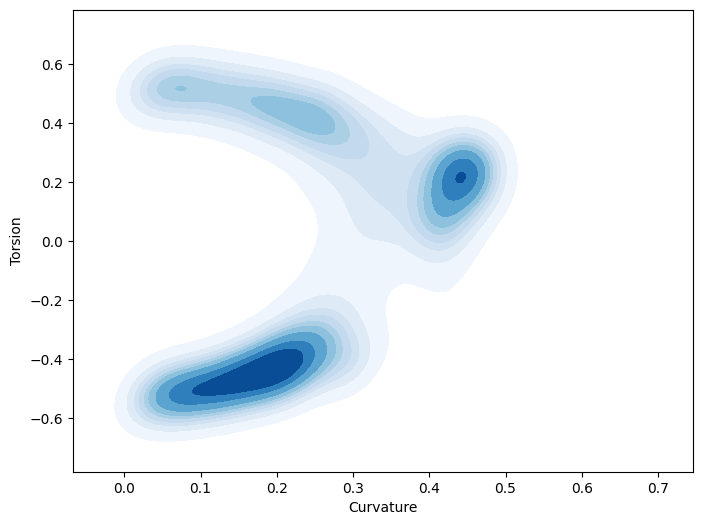

In [12]:

test = sse_data[::10]

# Plot the 2D KDE plot for Curvature and Torsion
plt.figure(figsize=(8, 6))
sns.kdeplot(
    x=test['Curvature'], y=test['Torsion'], fill=True, cmap="Blues", thresh=0.05
)


In [71]:
from scipy.stats import gaussian_kde
import numpy as np

def get_surface_grid(ss):

    sse_ = df[df['SSE'] == ss]
    curvature = sse_['Curvature'].values
    torsion = sse_['Torsion'].values
    kde_linker = gaussian_kde(np.vstack([curvature, torsion]))

    # Create grid over Curvature and Torsion
    x_min, x_max = -0.6, 0.6
    y_min, y_max = -0.6, 0.6

    x, y = np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100)

    xgrid, ygrid = np.meshgrid( x, y )
    grid_coords = np.vstack([xgrid.ravel(), ygrid.ravel()])

    # Evaluate KDE on the grid
    zgrid = kde_linker(grid_coords).reshape(xgrid.shape)
    

    return x, y, xgrid, ygrid, zgrid, kde_linker

In [77]:
x_h, y_h, xgrid_h, ygrid_h, zgrid_h, kde = get_surface_grid('H')
x_s, y_s, xgrid_s, ygrid_s, zgrid_s, kde = get_surface_grid('S')
x_l, y_l, xgrid_l, ygrid_l, zgrid_l, kde = get_surface_grid('-')

In [105]:
# Define camera settings for zooming out
camera = dict(
    eye=dict(x=1.5, y=1.5, z=1.5)  # Move the camera further back (increase these values to zoom out more)
)

In [116]:
import plotly.graph_objects as go

def plot_density_c_t(xgrid, ygrid, zgrid, color_map, write_name):
    # Create a 3D surface plot
    fig = go.Figure(go.Surface(x=xgrid, y=ygrid, z=zgrid, colorscale=color_map,  showscale=False))

    # Update layout for visual clarity and add zero grid lines
    fig.update_layout(
        title="Contour Plot with Grid Lines at Zero",
        font=dict(family="Arial", size=12),
        scene=dict(
            xaxis_title='Curvature',
            yaxis_title='Torsion',
            zaxis_title='Density',
            xaxis=dict(
                range=[-0.6, 0.6],              # Set x-axis range to [-0.6, 0.6]
                showgrid=True,                  # Enable the x-axis grid
                gridcolor='lightgray',          # Set the grid color
                gridwidth=1                     # Set grid line thickness
            ),
            yaxis=dict(
                range=[-0.6, 0.6],              # Set y-axis range to [-0.6, 0.6]
                showgrid=True,                  # Enable the y-axis grid
                gridcolor='lightgray',          # Set the grid color
                gridwidth=1                     # Set grid line thickness
            ),
            zaxis=dict(
                # range=[-10, zgrid_h_co.max()],  # Ensure the z-axis includes zero
                showgrid=True,                  # Enable the z-axis grid
                zeroline=True,                  # Add a line at z=0
                zerolinecolor='gray',           # Set the color of the zero line
                zerolinewidth=2,                # Make the zero line thicker for visibility
                gridcolor='lightgray',          # Set the grid color
                gridwidth=1,                     # Set grid line thickness
                
            ),
            camera = camera,
        ),
        template='plotly_white',
        height=900,
        width=800,
        
    )

    # Show the plot
    fig.write_image(write_name)

    fig.show()

In [117]:
# Custom color maps
white_to_red = [[0, 'white'], [1, '#fb4f4f']]
white_to_blue = [[0, 'white'], [1, '#6cc0e5']]
white_to_yellow = [[0, 'white'], [1, '#fbc93d']]

plot_density_c_t(xgrid_h, ygrid_h, zgrid_h, white_to_red, 'helix_dist.svg')

In [118]:
plot_density_c_t(xgrid_s, ygrid_s, zgrid_s, white_to_blue, 'sheet_dist.svg')

In [119]:
plot_density_c_t(xgrid_l, ygrid_l, zgrid_l, white_to_yellow, 'linker_dist.svg')

In [120]:
!pwd

/Users/josh/Documents/PhD/DevDungeon/carbonara


In [6]:
Red = '#fb4f4f'
Blue = '#6cc0e5'
Yellow = '#fbc93d'


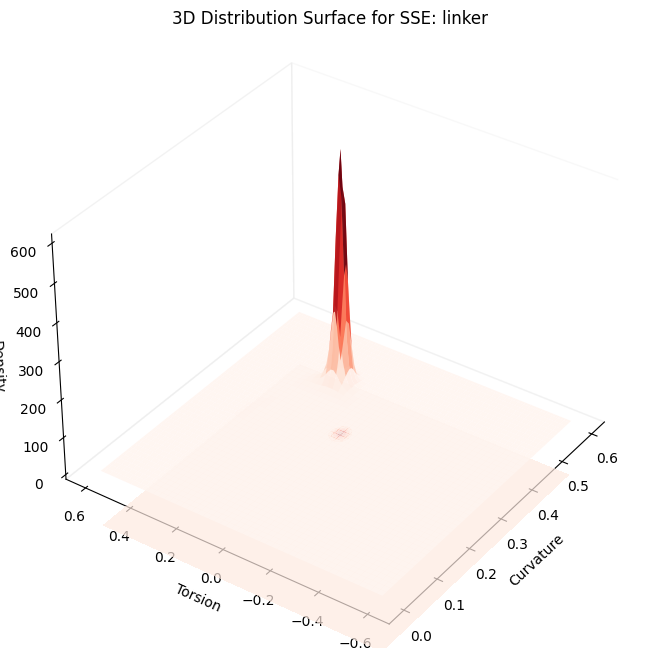

In [59]:
# Plot 3D surface
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the contour **first** to ensure it appears below the surface
ax.contourf(xgrid_h, ygrid_h, zgrid_h, zdir='z', offset= - 150, cmap='Reds', alpha=0.7)


im = ax.plot_surface(xgrid_h, ygrid_h, zgrid_h, cmap='Reds', edgecolor='None', linewidth=0, alpha=0.9)

# ax.contour(xgrid_h, ygrid_h, zgrid_h, zdir='z', offset=zgrid_h.min() - 0.1, cmap='Reds')
# Customize the angle for better visualization
ax.view_init(elev=35, azim=215)  # Adjust the angles as needed

ax.set_title(f'3D Distribution Surface for SSE: linker')
ax.set_xlabel('Curvature')
ax.set_ylabel('Torsion')
ax.set_zlabel('Density')

ax.grid(False)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

plt.show()

Exception: In order to reference traces by row and column, you must first use plotly.tools.make_subplots to create the figure with a subplot grid.

In [ ]:
xgrid_s, ygrid_s, zgrid_s = get_surface_grid('S')


In [8]:
import biobox as bb

In [9]:
m = bb.Molecule('/Users/josh/Documents/PhD/MyPapers/carbonaraPapers/carbonaraTheory/figures/xtal_data/Original_crystal_structure.pdb')

In [12]:
m.guess_chain_split()
m.write_pdb('/Users/josh/Documents/PhD/MyPapers/carbonaraPapers/carbonaraTheory/figures/xtal_data/Original_crystal_structure_chain_sep.pdb')